# Bias and Variance 

Let's generate data from a sine wave with some added error.

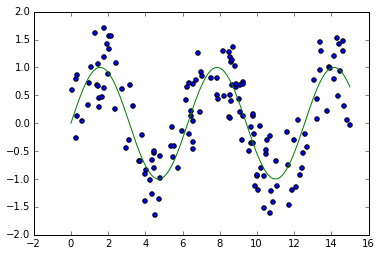

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

T_x = np.linspace(0, 15, 1000)[:, np.newaxis]
T_y = np.sin(T_x).ravel()

X = np.sort(15 * np.random.rand(150, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y += 1.5 * (0.5 - np.random.rand(150))

plt.plot(T_x,T_y,c='g')
plt.scatter(X,y)

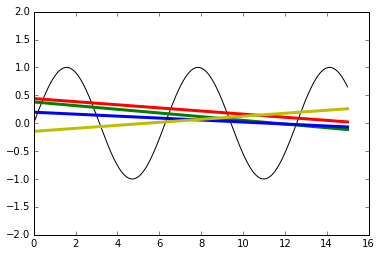

In [3]:
from sklearn import linear_model

plt.plot(T_x,T_y,c='k')
for i, j in zip(range(4), 'rgby'):
    index_array = np.arange(X.size)
    np.random.shuffle(index_array)
    
    rgr = linear_model.LinearRegression()
    rgr.fit(X[index_array[:60]].reshape(60, 1),y[index_array[:60]])
    plt.plot(T_x, rgr.predict(T_x.reshape(1000, 1)), color=j ,linewidth=3)
    plt.ylim(-2,2)

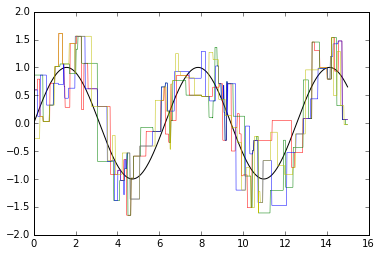

In [4]:
from sklearn import neighbors

plt.plot(T_x,T_y,c='k')
for i, j in zip(range(4), 'rgby'):
    index_array = np.arange(X.size)
    np.random.shuffle(index_array)
    
    knn = neighbors.KNeighborsRegressor(1)
    knn.fit(X[index_array[:60]].reshape(60, 1),y[index_array[:60]])
    plt.plot(T_x, knn.predict(T_x.reshape(1000, 1)), color=j ,linewidth=.5)
    plt.ylim(-2,2)